<a href="https://colab.research.google.com/github/ananaymital/llSPS-INT-190-Malaria-detection-from-cell-images/blob/master/malaria_detection_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image 

Change `path_to_folder` to the location of data folder

In [0]:
path_to_folder = "/content/drive/My Drive/ComputerVision/Image classification/Malria_detection/data/"
train_directory = path_to_folder+"train/"
test_directory = path_to_folder+"test/"


Testing access to images

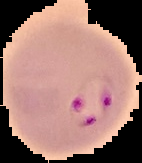

In [4]:
im = Image(filename=directory+"Parasitized/C33P1thinF_IMG_20150619_114756a_cell_179.png")
display(im)

In [5]:
from keras.preprocessing.image import ImageDataGenerator, img_to_array

Using TensorFlow backend.


In [6]:
datagen = ImageDataGenerator(validation_split=0.2, rescale=1./255, horizontal_flip=True, shear_range=0.25, zoom_range=0.25, rotation_range=20)

train_iterator = datagen.flow_from_directory(directory,
                                             subset='training', target_size=(64, 64), class_mode="binary", batch_size=1)
validation_iterator = datagen.flow_from_directory(directory, 
                                            subset='validation', target_size=(64, 64), class_mode="binary", batch_size=1)


Found 9609 images belonging to 2 classes.
Found 4117 images belonging to 2 classes.


In [0]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Dropout, MaxPool2D, Lambda, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.nn import fractional_max_pool


Just trying a baseline model. Need to try other variations

In [0]:
def frac_max_pool(x):
    return fractional_max_pool(x,2**0.5)[0]

model = Sequential()
model.add(Conv2D(32, kernel_size=3, activation="relu", padding="same", input_shape=train_iterator.target_size+(3,) ))
# model.add(Lambda(frac_max_pool))
model.add(Dropout(0.25))

# model.add(Conv2D(32, kernel_size=3, activation="relu", padding="same"))
# model.add(BatchNormalization())
# model.add(Dropout(0.25))

# model.add(Conv2D(64, kernel_size=3, activation="relu", padding="same"))
# model.add(BatchNormalization())
# model.add(Dropout(0.25))

# model.add(Conv2D(64, kernel_size=3, activation="relu", padding="same"))
# model.add(BatchNormalization())
# model.add(Dropout(0.25))

model.add(Flatten())

# model.add(Dense(512, activation="relu", use_bias=True))
# model.add(Dropout(0.25))

model.add(Dense(1, use_bias=True))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [9]:
history = model.fit(train_iterator, batch_size=1, epochs=30, steps_per_epoch=50, validation_data=test_iterator, validation_batch_size=1, validation_steps=50)

Epoch 1/30
50/50 [==============================] - 27s 539ms/step - loss: 4.6275 - accuracy: 0.7000 - val_loss: 2.4691 - val_accuracy: 0.8400
Epoch 2/30
50/50 [==============================] - 28s 567ms/step - loss: 3.7029 - accuracy: 0.7600 - val_loss: 2.1595 - val_accuracy: 0.8600
Epoch 3/30
50/50 [==============================] - 28s 552ms/step - loss: 4.3190 - accuracy: 0.7200 - val_loss: 3.7020 - val_accuracy: 0.7600
Epoch 4/30
50/50 [==============================] - 27s 536ms/step - loss: 2.7765 - accuracy: 0.8200 - val_loss: 2.7765 - val_accuracy: 0.8200
Epoch 5/30
50/50 [==============================] - 28s 563ms/step - loss: 4.3190 - accuracy: 0.7200 - val_loss: 2.7765 - val_accuracy: 0.8200
Epoch 6/30
50/50 [==============================] - 32s 648ms/step - loss: 2.1595 - accuracy: 0.8600 - val_loss: 2.7765 - val_accuracy: 0.8200
Epoch 7/30
50/50 [==============================] - 56s 1s/step - loss: 4.0105 - accuracy: 0.7400 - val_loss: 2.4680 - val_accuracy: 0.8400
Ep

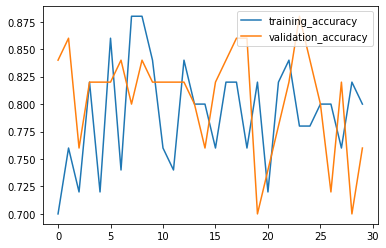

In [10]:
plt.plot(history.history.get("accuracy"))

plt.plot(history.history.get("val_accuracy"))
plt.legend(["training_accuracy", "validation_accuracy"])

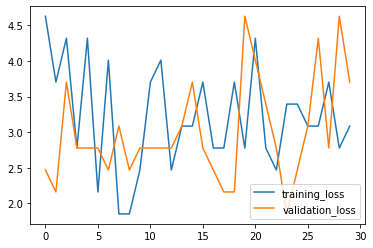

In [11]:
plt.plot(history.history.get("loss"))

plt.plot(history.history.get("val_loss"))
plt.legend(["training_loss", "validation_loss"])

In [13]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_iterator = test_datagen.flow_from_directory(test_directory, batch_size=1)

Found 3427 images belonging to 2 classes.


In [0]:
from sklearn.metrics import confusion_matrix

No output generated even after 10 minutes. Need ideas on what could be the reason

In [0]:
predictions = model.predict(test_iterator)

In [0]:
print('Confusion Matrix')
print(confusion_matrix(test_iterator.classes, predictions))